In [5]:
import ast
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

results_dir = Path.cwd() / "results"
if not results_dir.exists():
    results_dir = Path.cwd().parent / "results"
if not results_dir.exists():
    raise FileNotFoundError(f"Could not find results directory from {Path.cwd()}")

# MNIST

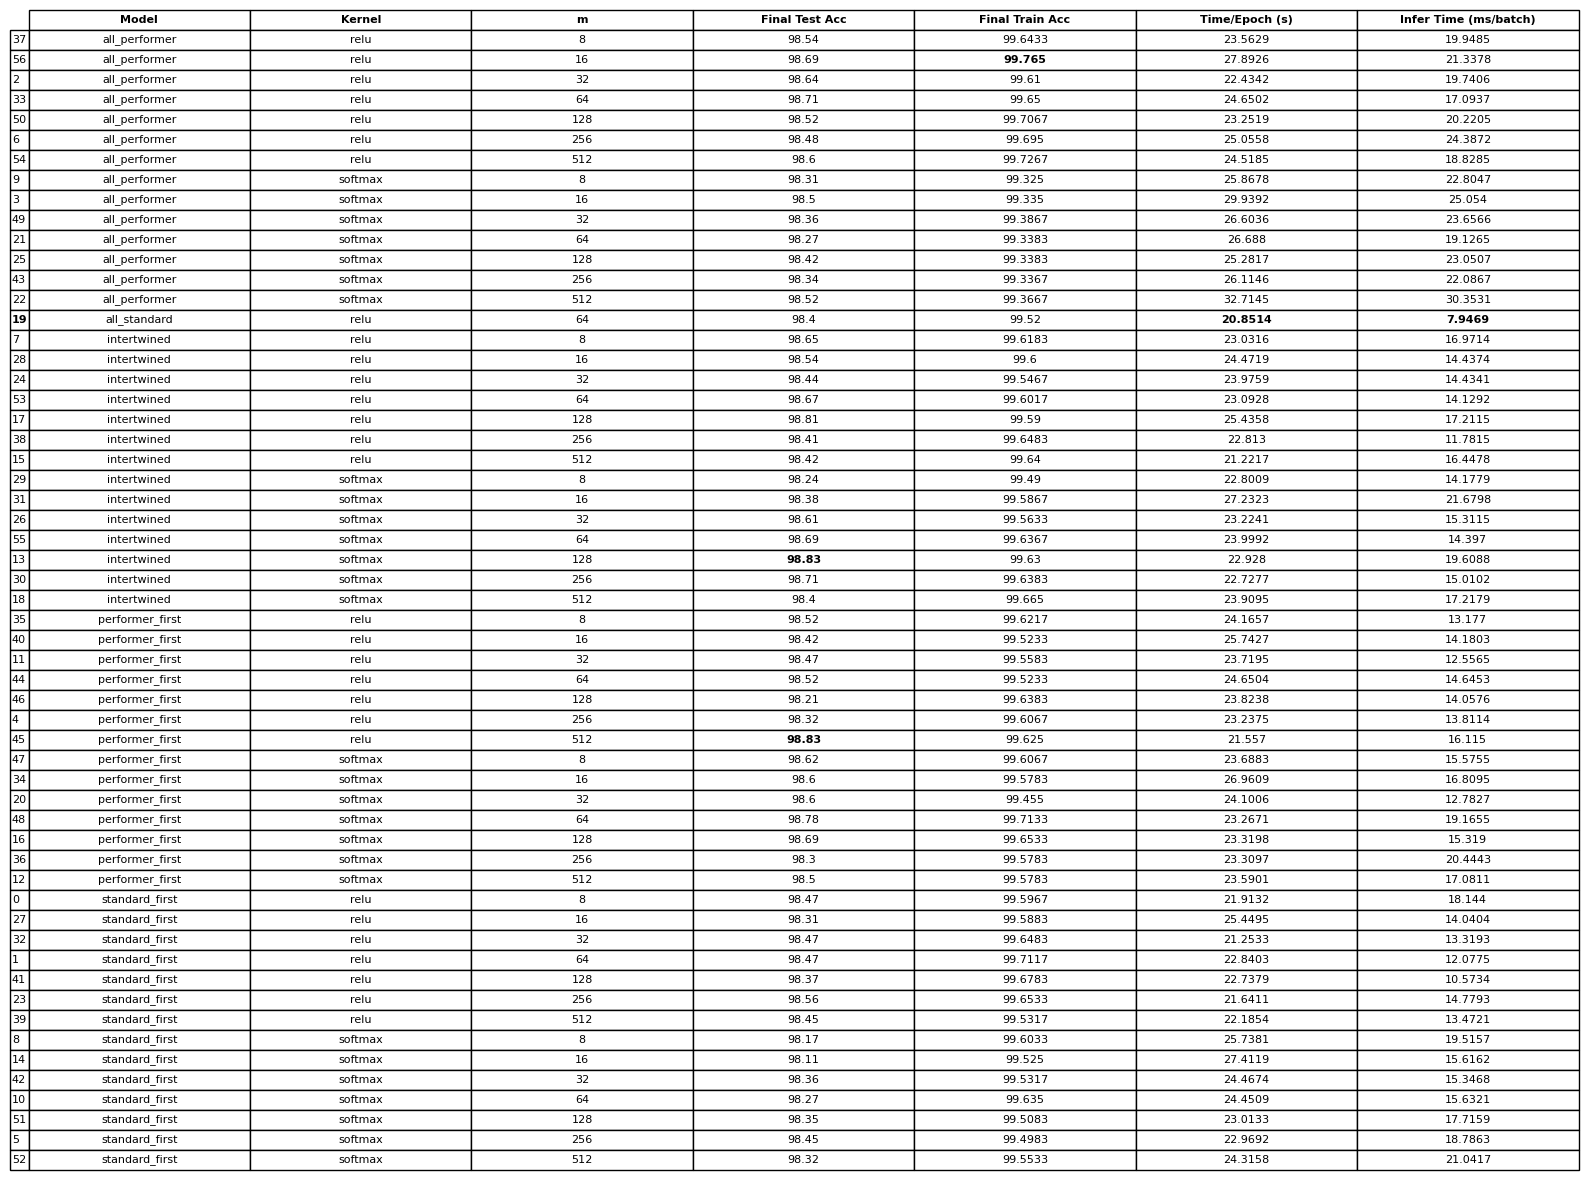

In [9]:
DATASET = "MNIST"

rows = []
for csv_path in results_dir.glob("*/*summary*.csv"):
    ds_name = csv_path.parent.name
    if DATASET and ds_name != DATASET:
        continue

    row = pd.read_csv(csv_path).iloc[0]
    history = ast.literal_eval(row["history"]) if pd.notna(row["history"]) else []
    final = history[-1] if history else {}

    rows.append(
        {
            "Model": row["architecture"],
            "Kernel": row["kernel_type"],
            "m": row["m_features"],
            "Final Test Acc": final.get("test_acc", row.get("best_test_acc")),
            "Final Train Acc": final.get("train_acc"),
            "Time/Epoch (s)": final.get("epoch_time", row["avg_train_time_per_epoch"]),
            "Infer Time (ms/batch)": row["infer_time_per_batch_mean_ms"],
        }
    )

if not rows:
    raise ValueError(f"No summary rows found for DATASET={DATASET} in {results_dir}")

table_df = pd.DataFrame(rows)
num_cols = ["Final Test Acc", "Final Train Acc", "Time/Epoch (s)", "Infer Time (ms/batch)"]
for col in num_cols:
    table_df[col] = pd.to_numeric(table_df[col], errors="coerce").round(4)

table_df = table_df.sort_values(["Model", "Kernel", "m"])

best_values = {
    "Final Test Acc": table_df["Final Test Acc"].max(),
    "Final Train Acc": table_df["Final Train Acc"].max(),
    "Time/Epoch (s)": table_df["Time/Epoch (s)"].min(),
    "Infer Time (ms/batch)": table_df["Infer Time (ms/batch)"].min(),
}

fig, ax = plt.subplots(figsize=(20, 10))
ax.axis("off")
tbl = pd.plotting.table(ax, table_df, loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1, 1.2)

for (r, c), cell in tbl.get_celld().items():
    if r == 0:  # header
        cell.set_text_props(weight="bold")
        continue
    col_name = table_df.columns[c]
    if col_name in best_values:
        val = table_df.iloc[r - 1, c]
        if pd.notna(val) and val == best_values[col_name]:
            cell.set_text_props(weight="bold")

plt.show()

In [ ]:
import ast
from pathlib import Path

import pandas as pd

DATASET = "CIFAR10"  # "CIFAR10", "MNIST", or None for both

results_dir = Path.cwd() / "results"
if not results_dir.exists():
    results_dir = Path.cwd().parent / "results"
if not results_dir.exists():
    raise FileNotFoundError(f"Could not find results directory from {Path.cwd()}")

rows = []
for csv_path in results_dir.glob("*/*summary*.csv"):
    ds_name = csv_path.parent.name
    if DATASET and ds_name != DATASET:
        continue

    row = pd.read_csv(csv_path).iloc[0]
    history = ast.literal_eval(row["history"]) if pd.notna(row["history"]) else []
    final = history[-1] if history else {}

    rows.append(
        {
            "Model": row["architecture"],
            "Kernel": row["kernel_type"],
            "m": int(row["m_features"]),
            "Final Test Acc": final.get("test_acc", row.get("best_test_acc")),
            "Final Train Acc": final.get("train_acc"),
            "Time/Epoch (s)": final.get("epoch_time", row["avg_train_time_per_epoch"]),
            "Infer Time (ms/batch)": row["infer_time_per_batch_mean_ms"],
        }
    )

if not rows:
    raise ValueError(f"No summary rows found for DATASET={DATASET} in {results_dir}")

table_df = pd.DataFrame(rows)
num_cols = ["Final Test Acc", "Final Train Acc", "Time/Epoch (s)", "Infer Time (ms/batch)"]
for col in num_cols:
    table_df[col] = pd.to_numeric(table_df[col], errors="coerce").round(4)

table_df = table_df.sort_values(["Model", "Kernel", "m"])

best_values = {
    "Final Test Acc": table_df["Final Test Acc"].max(),
    "Final Train Acc": table_df["Final Train Acc"].max(),
    "Time/Epoch (s)": table_df["Time/Epoch (s)"].min(),
    "Infer Time (ms/batch)": table_df["Infer Time (ms/batch)"].min(),
}

def fmt_val(val, col):
    if pd.isna(val):
        return ""
    s = f"{val:.4f}" if col in num_cols else str(val)
    if col in best_values and val == best_values[col]:
        return r"\textbf{" + s + "}"
    return s

latex = table_df.to_latex(
    index=False,
    escape=False,
    formatters={col: (lambda v, c=col: fmt_val(v, c)) for col in table_df.columns},
    column_format="llr" + "r" * len(num_cols),  # tweak alignment as needed
)

print(latex)

\begin{tabular}{llrrrrr}
\toprule
Model & Kernel & m & Final Test Acc & Final Train Acc & Time/Epoch (s) & Infer Time (ms/batch) \\
\midrule
all_performer & relu & 8 & 73.6100 & 88.5140 & 24.0897 & 18.8587 \\
all_performer & relu & 16 & 72.7700 & 89.6720 & 22.6134 & 15.9992 \\
all_performer & relu & 32 & 72.4200 & 89.6180 & 24.0224 & 18.3311 \\
all_performer & relu & 64 & 72.6000 & 90.1620 & 24.6928 & 19.7179 \\
all_performer & relu & 128 & 72.6100 & 90.0580 & 24.2176 & 19.2815 \\
all_performer & relu & 256 & 73.4900 & 89.7000 & 24.8125 & 25.2888 \\
all_performer & relu & 512 & 73.8100 & 88.9160 & 28.0390 & 23.7646 \\
all_performer & softmax & 8 & 72.6700 & 80.0140 & 23.0582 & 21.1313 \\
all_performer & softmax & 16 & 72.9100 & 81.9060 & 24.1141 & 22.3367 \\
all_performer & softmax & 32 & 72.9400 & 82.1580 & 22.9226 & 20.6515 \\
all_performer & softmax & 64 & 73.4400 & 81.6580 & 25.3149 & 22.4881 \\
all_performer & softmax & 128 & 73.0000 & 82.0760 & 25.3509 & 20.0774 \\
all_performer 

# CIFAR-10

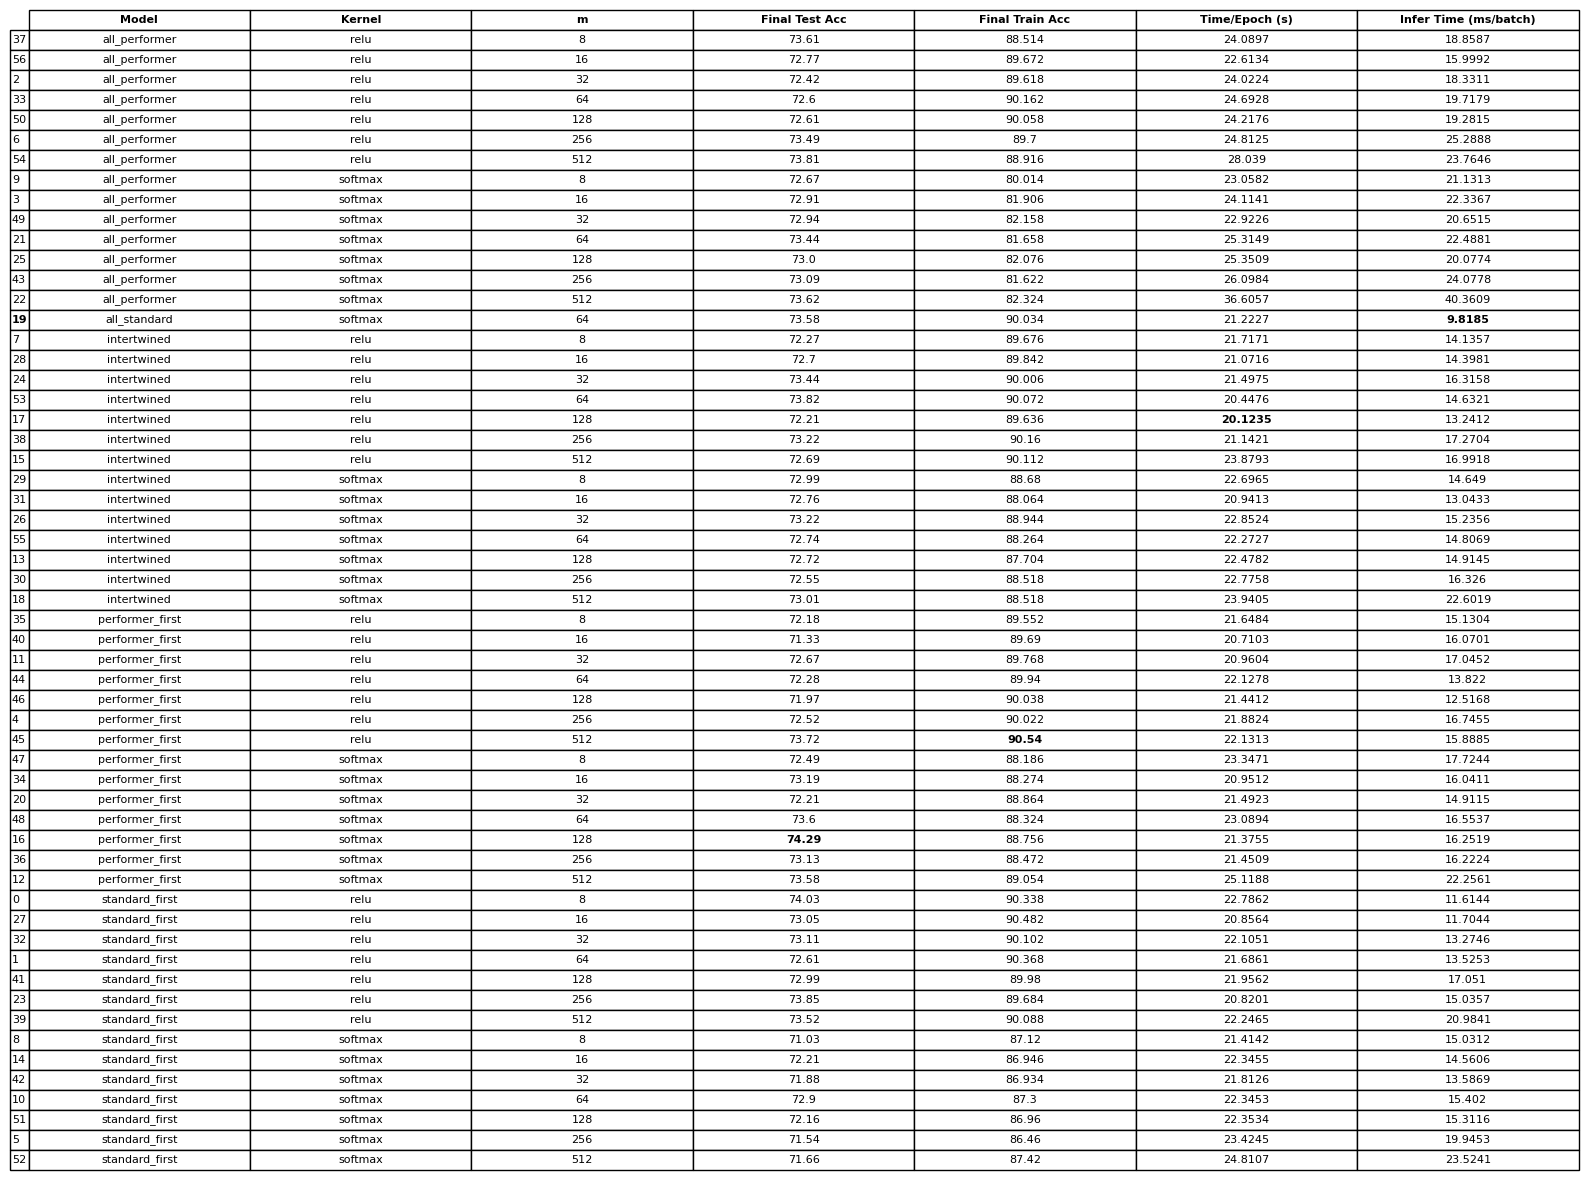

In [10]:
DATASET = "CIFAR10"

rows = []
for csv_path in results_dir.glob("*/*summary*.csv"):
    ds_name = csv_path.parent.name
    if DATASET and ds_name != DATASET:
        continue

    row = pd.read_csv(csv_path).iloc[0]
    history = ast.literal_eval(row["history"]) if pd.notna(row["history"]) else []
    final = history[-1] if history else {}

    rows.append(
        {
            "Model": row["architecture"],
            "Kernel": row["kernel_type"],
            "m": row["m_features"],
            "Final Test Acc": final.get("test_acc", row.get("best_test_acc")),
            "Final Train Acc": final.get("train_acc"),
            "Time/Epoch (s)": final.get("epoch_time", row["avg_train_time_per_epoch"]),
            "Infer Time (ms/batch)": row["infer_time_per_batch_mean_ms"],
        }
    )

if not rows:
    raise ValueError(f"No summary rows found for DATASET={DATASET} in {results_dir}")

table_df = pd.DataFrame(rows)
num_cols = ["Final Test Acc", "Final Train Acc", "Time/Epoch (s)", "Infer Time (ms/batch)"]
for col in num_cols:
    table_df[col] = pd.to_numeric(table_df[col], errors="coerce").round(4)

table_df = table_df.sort_values(["Model", "Kernel", "m"])

best_values = {
    "Final Test Acc": table_df["Final Test Acc"].max(),
    "Final Train Acc": table_df["Final Train Acc"].max(),
    "Time/Epoch (s)": table_df["Time/Epoch (s)"].min(),
    "Infer Time (ms/batch)": table_df["Infer Time (ms/batch)"].min(),
}

fig, ax = plt.subplots(figsize=(20, 10))
ax.axis("off")
tbl = pd.plotting.table(ax, table_df, loc="center", cellLoc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
tbl.scale(1, 1.2)

for (r, c), cell in tbl.get_celld().items():
    if r == 0:  # header
        cell.set_text_props(weight="bold")
        continue
    col_name = table_df.columns[c]
    if col_name in best_values:
        val = table_df.iloc[r - 1, c]
        if pd.notna(val) and val == best_values[col_name]:
            cell.set_text_props(weight="bold")

plt.show()